In [ ]:
# Installing Libraries

!pip install scikit-learn
!pip install graphviz
!pip install -U dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.8 MB/s eta 0:00:00


In [ ]:
# Imports
import dtreeviz
import graphviz
import pydotplus

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
# Load the dataset from a CSV file
data = pd.read_csv('/content/drive/MyDrive/Data Mining and ML/combined_dataset.csv')

data=data[data['Income_rate'].notna()]

# Define economic well-being based on thresholds
threshold_income = 0.3
threshold_employment = 0.3

def categorize_economic_wellbeing(row):
    if row['Income_rate'] > threshold_income and row['Employment_rate'] > threshold_employment:
        return "High"
    elif row['Income_rate'] > threshold_income or row['Employment_rate'] > threshold_employment:
        return "Medium"
    else:
        return "Low"

# Add the "Economic_Wellbeing" column based on the criteria
data['Economic_Wellbeing'] = data.apply(categorize_economic_wellbeing, axis=1)

# Define class names based on the categories in 'Economic_Wellbeing'
class_names = ['Low', 'Medium', 'High']

In [ ]:
target = data['Economic_Wellbeing']

features = data[['DEPRESS', 'ALCOHOL', 'DRUG', 'EMERG', 'Noquals', 'overcrowded_rate', 'nocentralheat_rate']]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

max_depth=5
model = DecisionTreeClassifier(max_depth=max_depth)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for regression
#mse = mean_squared_error(y_test, predictions)

score = accuracy_score(y_test, predictions)

print(f"Accuracy: {score * 100:.2f}%")

Accuracy: 94.57%


In [ ]:
# Additional evaluation metrics
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

        High       0.45      0.53      0.49        47
         Low       0.97      0.99      0.98      2270
      Medium       0.35      0.19      0.25        95

    accuracy                           0.95      2412
   macro avg       0.59      0.57      0.57      2412
weighted avg       0.94      0.95      0.94      2412

Confusion Matrix:
[[  25   11   11]
 [  10 2238   22]
 [  20   57   18]]


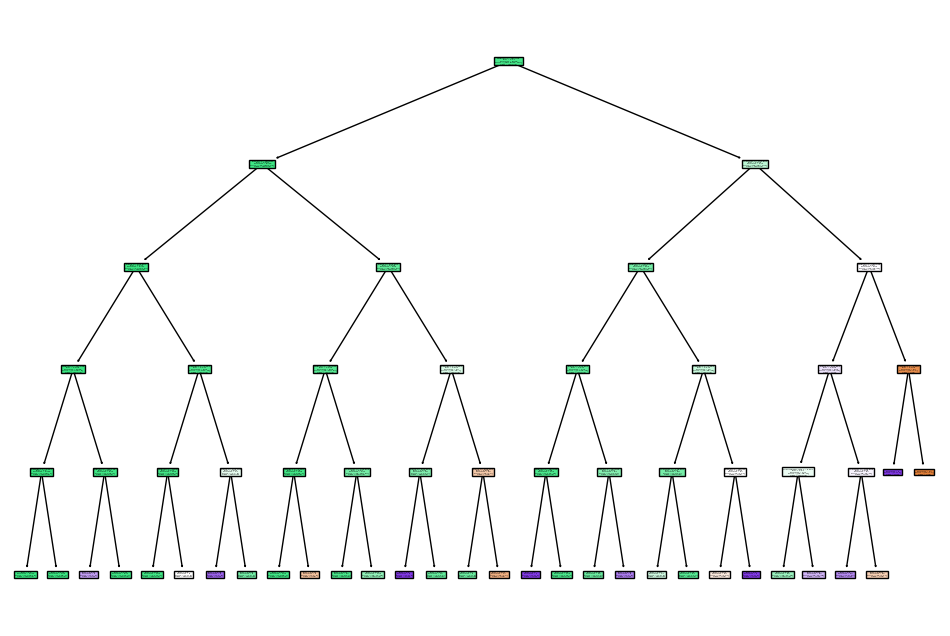

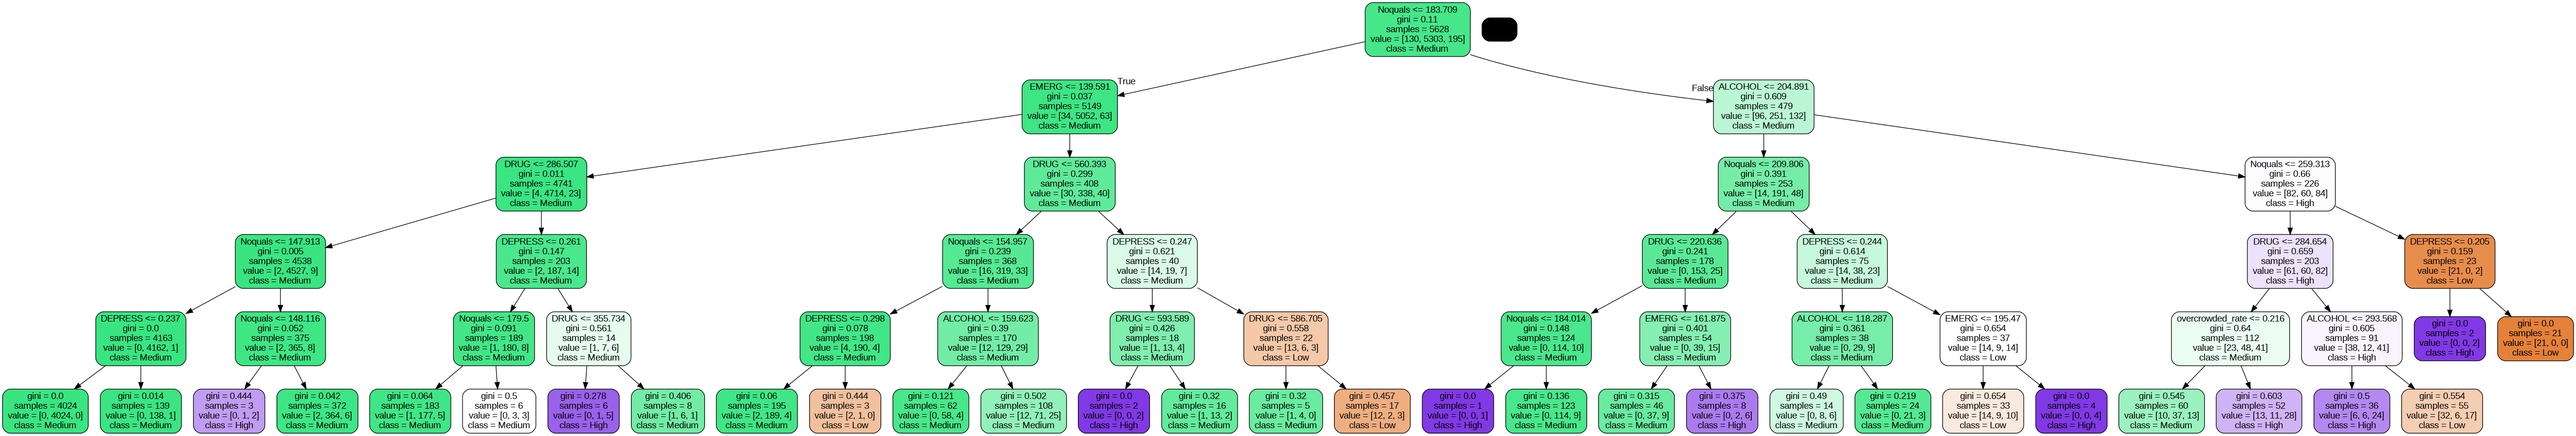

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=features.columns, class_names=class_names)
plt.show()

# Export the Decision Tree in Graphviz DOT format
dot_data = export_graphviz(model, out_file=None,
                           feature_names=features.columns,
                           class_names=class_names,
                           filled=True, rounded=True)

# Create a Graphviz object and render the decision tree
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("decision_tree.png")
Image(graph.create_png())